# 시각화(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"C:\Users\leeyh\OneDrive\문서\기계학습및설계") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

In [2]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

C:\Users\leeyh\AppData\Local\Temp\ipykernel_17476\1979260110.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/


In [3]:
#데이터 일부 확인
df=pd.read_csv("winequality-red.csv",encoding='euc-kr') 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count')

,nan_count
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
# 변수 타입 파악
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#통계량 파악
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


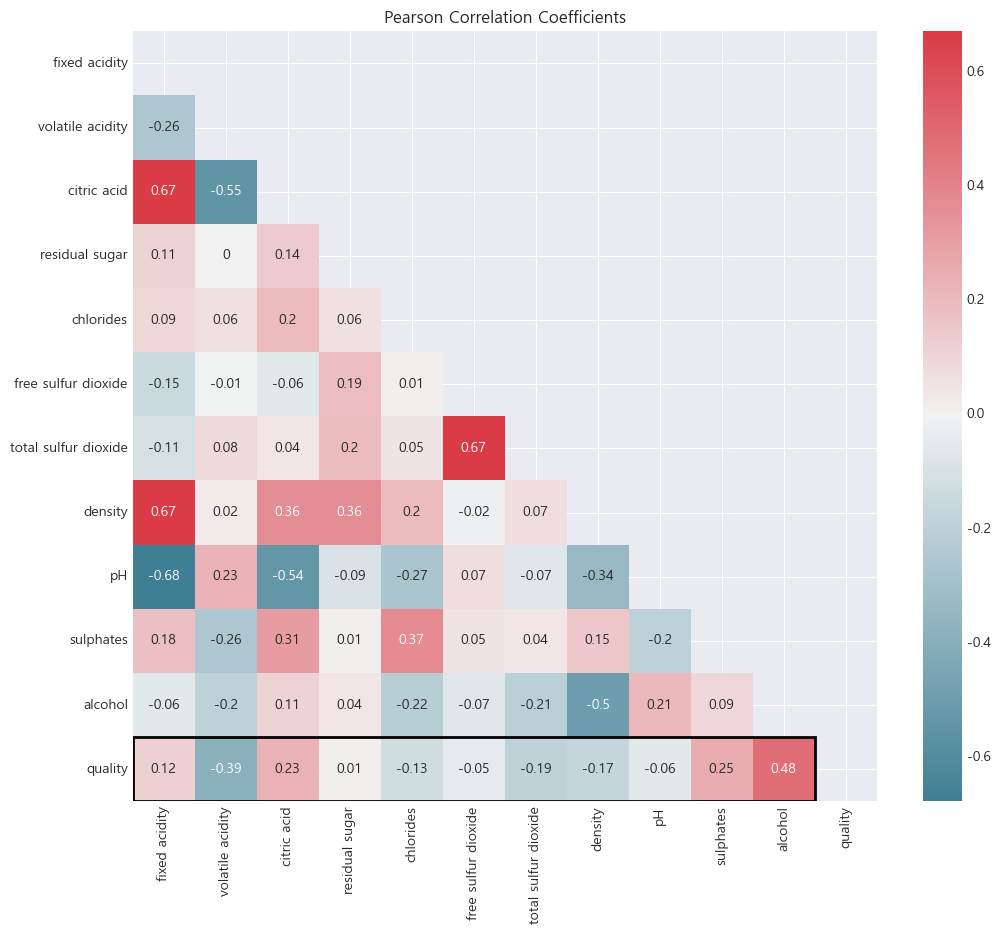

In [7]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = round(df.corr(), 2)
plt.figure(figsize=(12,10))
plt.title("Pearson Correlation Coefficients")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(corr, cmap=cmap, annot=True, mask=mask)

rect_x = 0
rect_y = 11
rect_width = 11
rect_height = 1
rect = plt.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=2, edgecolor='black', facecolor='none')
plt.gca().add_patch(rect)
plt.show()

#0.8 이상: 강한 상관관계, 0.4~0.8: 중간의 상관관계, 0.4 이하: 약한 상관관계
#결과적으로, (fixed acidity-citric acid: 0.67)/(fixed acidity-density: 0.67)/(free sulfur dioxide-total sulfur dioxide: 0.67)
#(quality-alcohol:0.48)/(pH-fixed cidity: -0.68)/(citric acid-volatile acidity :-0.55)-> 중간정도의 상관관계


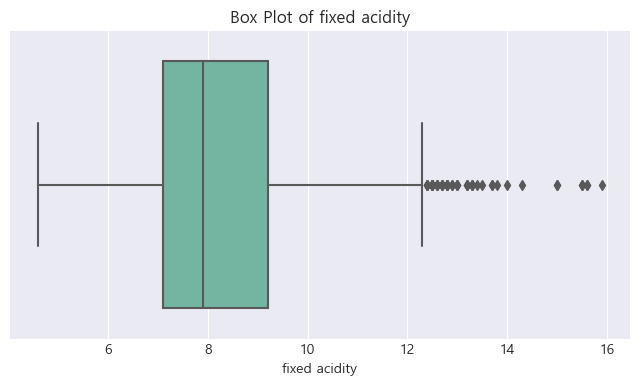

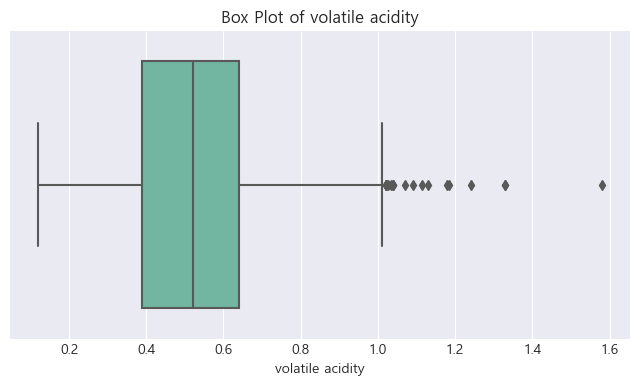

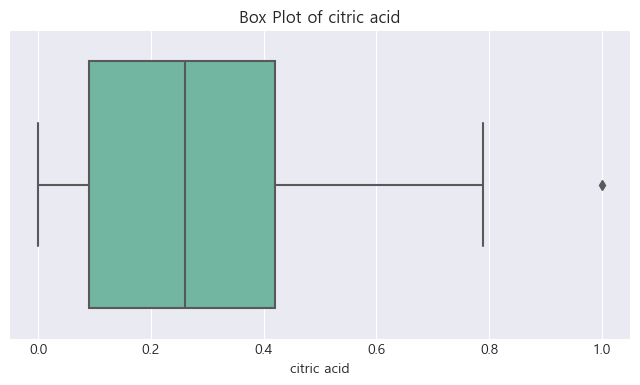

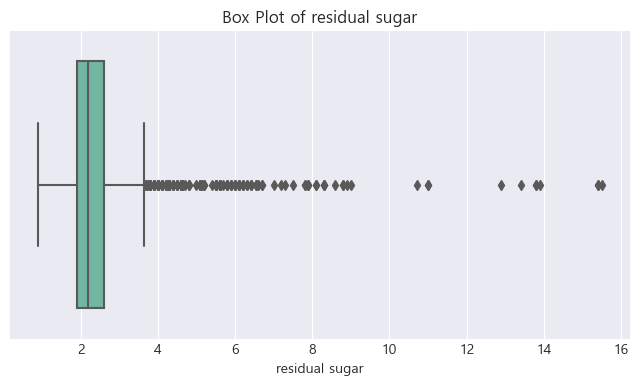

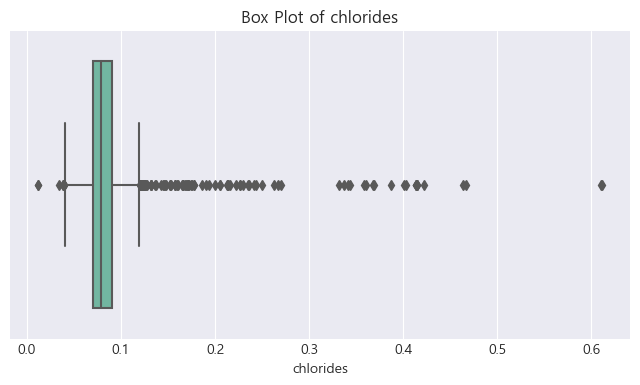

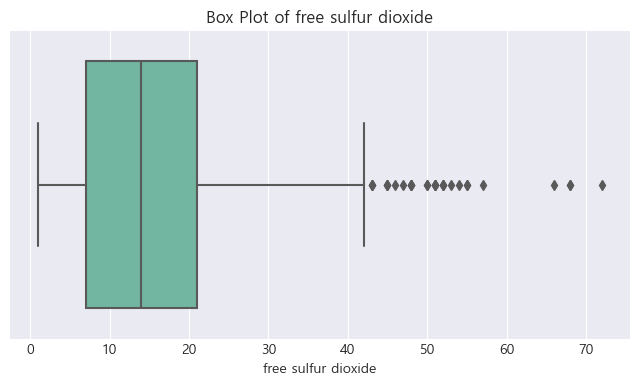

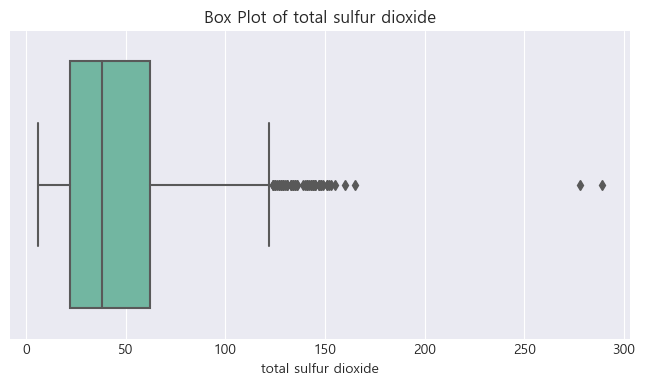

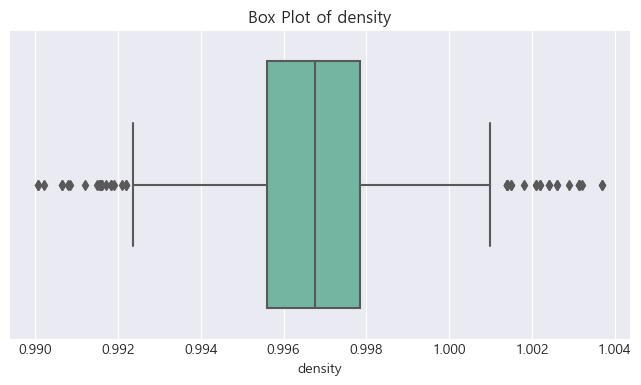

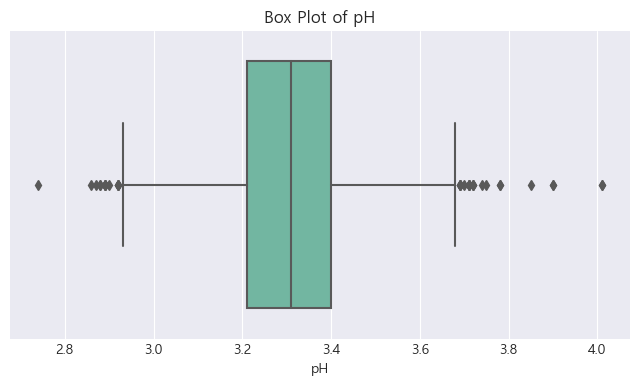

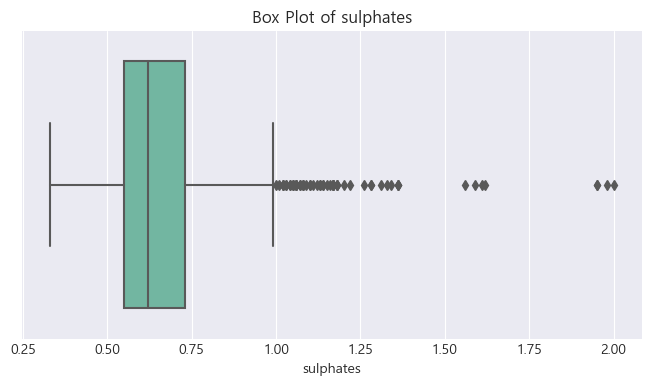

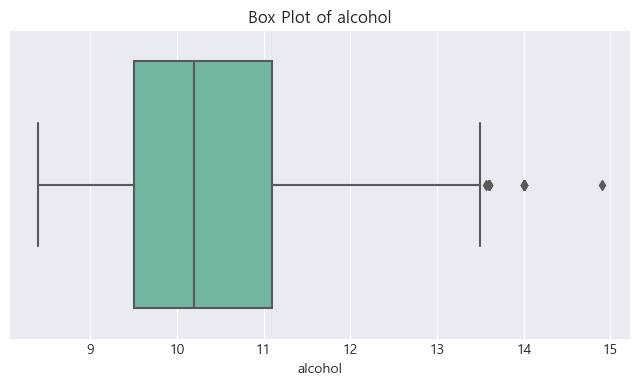

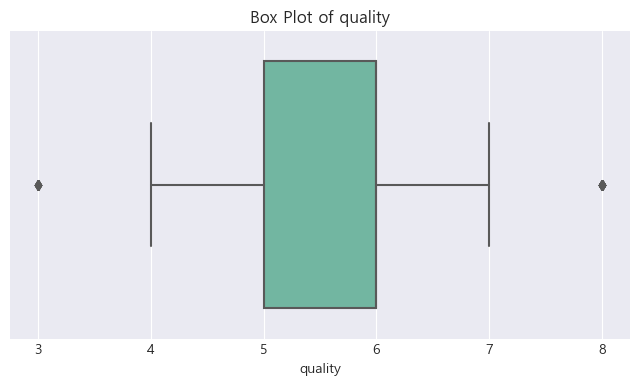

In [8]:
#Boxplot of all variables
columns_to_plot = df.columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {col}')
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.show()

Text(0.5, 1.0, 'Count of Wine Quality')

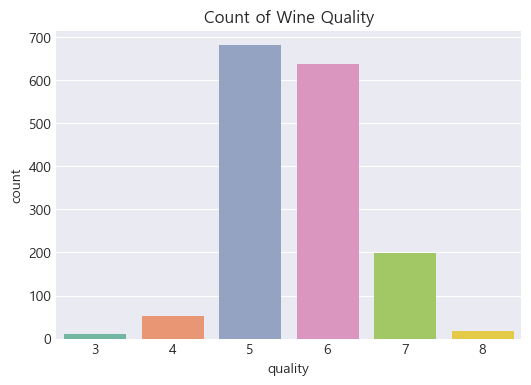

In [9]:
#Countplot of Quality Variable
plt.figure(figsize=(6, 4))
sns.countplot(x="quality", data=df, palette="Set2")
plt.title("Count of Wine Quality")

#결과적으로, quality 변수는 3-8까지만 존재함을 알 수 있다.

Text(0.5, 1.0, 'Violin Plot of Alcohol by Wine Quality')

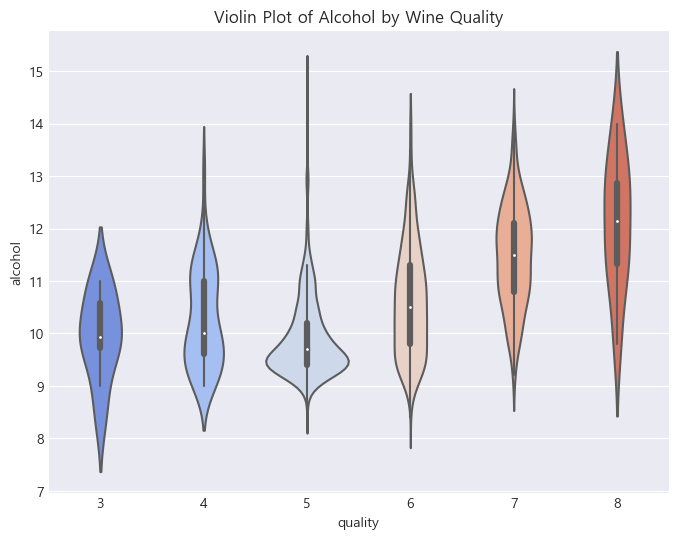

In [10]:
#바이올린 플롯(alcohol-quality), 품질과 상관계수가 가장 높은 alcohol 변수
plt.figure(figsize=(8, 6))
sns.violinplot(x="quality",y="alcohol", data=df, palette="coolwarm")
plt.title("Violin Plot of Alcohol by Wine Quality")

In [11]:
#Standardization 표준화..?
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df.iloc[:,:-1]=std.fit_transform(df.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)

# 테스트 데이터&트레인 데이터

In [12]:
from sklearn.model_selection import train_test_split
X = df[df.columns.difference(['quality'])]
y = df[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

(1279, 11)
(320, 11)
(1279, 1)
(320, 1)
(1599, 12)


# (1)SelectKBest 모듈 활용하여 변수 선택

#####scikit-learn의 SelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다. 상관관계를 분석하는 방법은 f-regression 방식과 chi2(카이제곱)방식, f-classif 등이 있습니다. 본 분석에서는 f-regression을 사용했습니다.

In [13]:
# target(quality)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=5)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1279, 5), (320, 5))

#####위 결과값을 보시면, 컬럼수가 5개로 줄어든 것을 확인할 수 있습니다. SelectKbest모듈이 타겟변수와 상관관계가 높은 5개 컬럼을 선정한 것인데요, 상세하게 어떤 컬럼을 선정했는지 살펴보겠습니다.

In [14]:
all_names = X_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['alcohol', 'citric acid', 'sulphates', 'total sulfur dioxide',
       'volatile acidity'],
      dtype='object')
Unselected names:  Index(['chlorides', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH',
       'residual sugar'],
      dtype='object')


# EDA 분석-(5) Regplot 

#### RegPlot은 Regression Plot의 약자이다.
데이터의 분포와, 이 데이터를 선형으로 표현하는 Regression Line을 동시에 표현해주는 그래프이다.

In [15]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


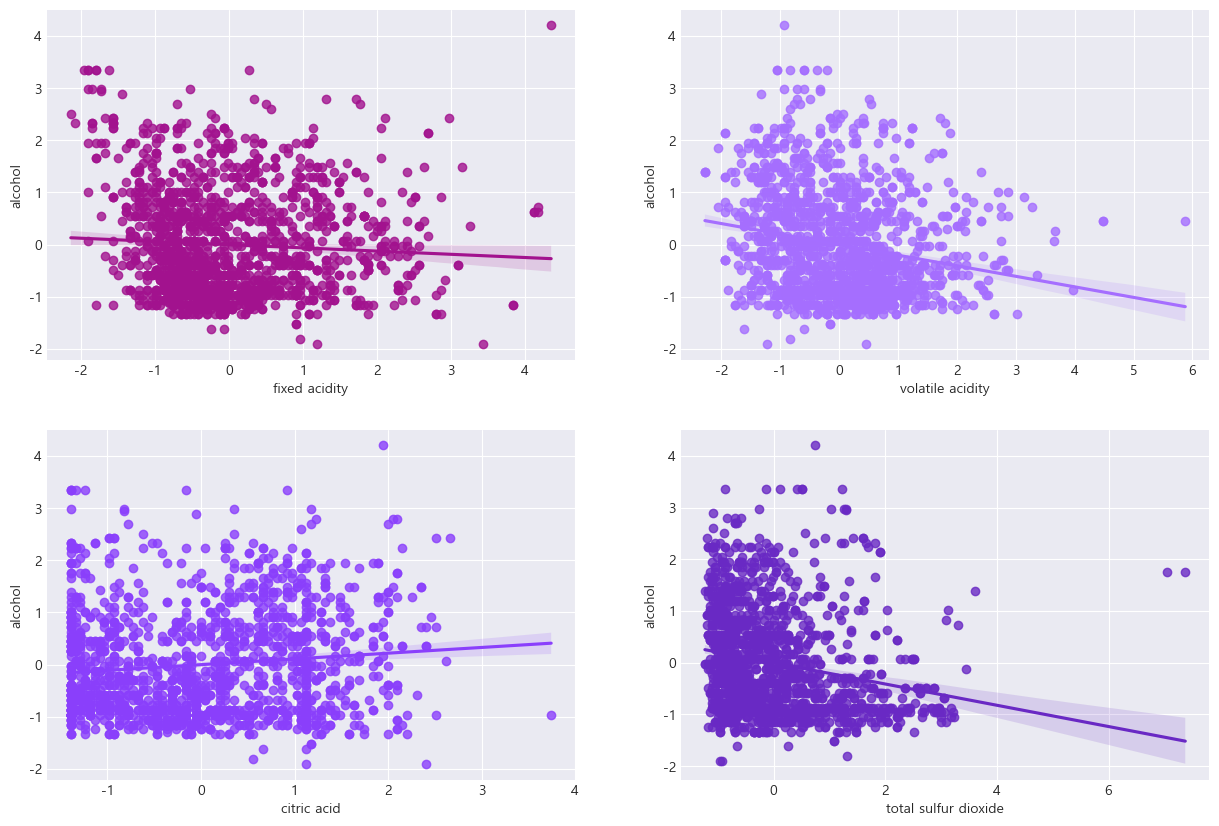

In [17]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "fixed acidity", y = "alcohol", data = df, color = "#A2128E");
sns.regplot(ax = axes[1], x = "volatile acidity", y = "alcohol", data = df, color = "#A56EFF");
sns.regplot(ax = axes[2], x = "citric acid", y = "alcohol", data = df, color = "#8A3FFC");
sns.regplot(ax = axes[3], x = "total sulfur dioxide", y = "alcohol", data = df, color = "#6929C4");

###### Attention to the negative linear relationships between the "alcohol" - "volatile acidity" and "alcohol" - "total_sulfur_dioxide" variables.
(음의 선형관계를 나타내는 "알콜-휘발성 산" 그리고 "알콜-총 황산염")

# EDA분석-(6)Hexagonal Binned Plot(육각형 격자 그림)
hexbin plot은 산점도를 히스토그램 형태의 육각형(binning)으로 표현한 그래픽이다. 이는 seaborn과 Matplotlib 같은 시각화 라이브러리에서 제공되며, 주로 두 변수 간의 관계를 효과적으로 시각화하기 위해 사용된다.

### 기존의 산점도와의 다른점(차별점)
기존의 산점도는 데이터 포인트의 밀도가 높아질수록 점이 겹쳐져 가독성이 떨어질 수 있다. hexbin plot은 이러한 문제를 해결하기 위해 데이터를 육각형으로 나누고 각 육각형에 속하는 데이터 포인트의 개수를 색상으로 표현한다.

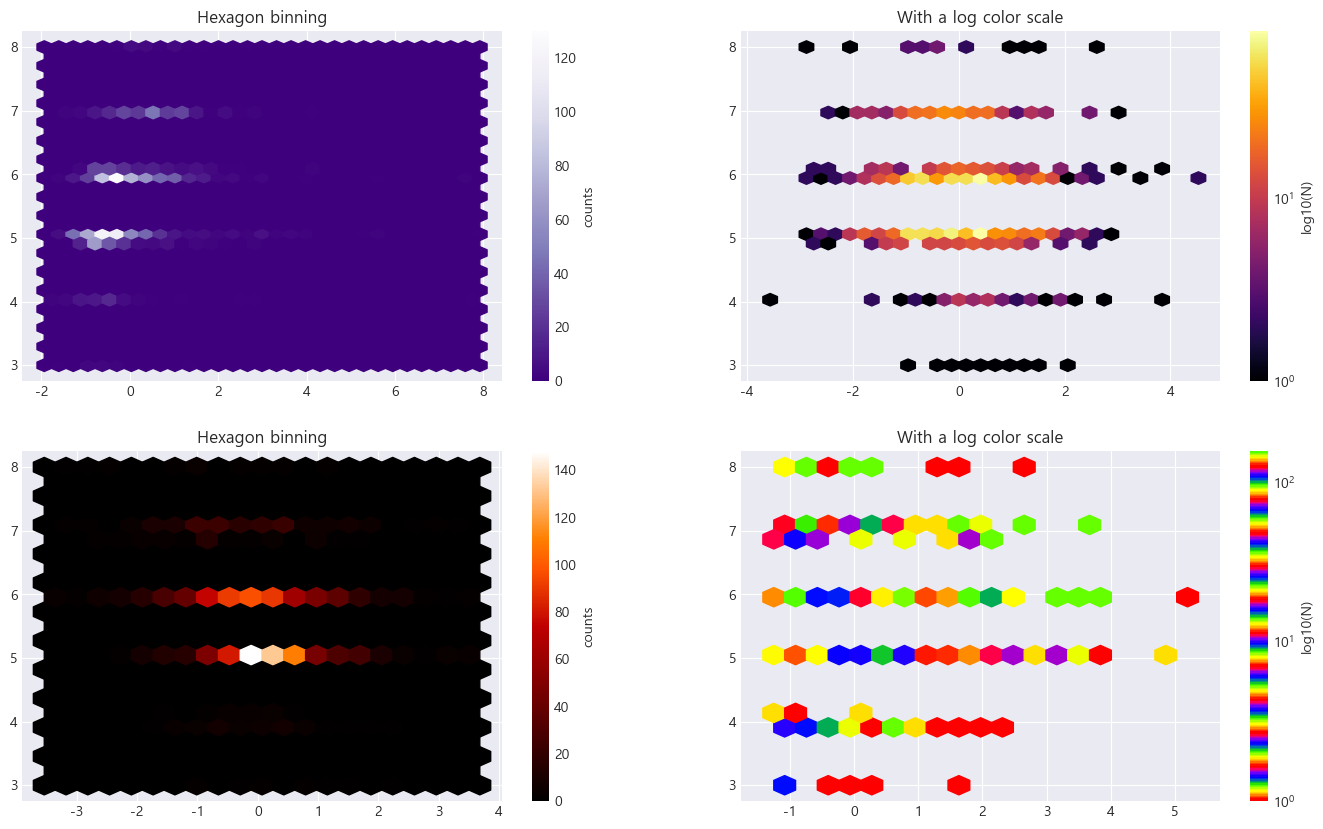

In [19]:
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 10))

hb = ax0.hexbin(df["sulphates"], df["quality"], gridsize = 30, cmap = 'Purples_r')
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax0, label = 'counts')


hb = ax1.hexbin(df["pH"], df["quality"], gridsize = 30, bins = 'log', cmap = 'inferno')
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax1, label = 'log10(N)')


hb = ax2.hexbin(df["density"], df["quality"], gridsize = 20, cmap = 'gist_heat')
ax2.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax2, label = 'counts')

hb = ax3.hexbin(df["free sulfur dioxide"], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'prism')
ax3.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax3, label = 'log10(N)')

plt.show()

#### 우선 위 코드의 출력 그림에서는,
(1) x-황산염, y-품질
(2) x-pH, y-품질
(3) x-밀도, y-품질
(4) x-자유황산염, y-품질

를 나타내고 있다.